This dataset offers vital insights into the Global Climate Risk Index, highlighting economic data and the impact of climate-related disasters on countries worldwide. By analyzing columns such as geom, cri_rank, cri_score, fatalities_per_100k_rank, fatalities per 100k total, and fatalities rank, you can identify the regions most affected by climate hazards. This comprehensive information can help strategize solutions to reduce potential losses and enhance preparedness.We can work towards a safer future where communities are shielded from the challenges of global climate change.



##### Key Questions

- What are the trends in fatalities across countries with high climate risk?

- Which countries face the highest economic losses, and are there correlations with their CRI ranks?

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


#### Climate Risk Index     

In [355]:
# Load the dataset
index_df = pd.read_csv(r'C:\Users\user\Documents\flatiron\Phase 5\Capstone-Project---Group-8\Data\Climate Change - datasets\Climate Risk Index.csv')
index_df

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,178,NaN,NaN,Seychelles,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SYC,Seychelles
178,178,179,NaN,NaN,Gambia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GMB,Gambia
179,179,180,NaN,NaN,Togo,131,114.33,104,0.01,102,1,123,0.0012,130,0.130,TGO,Togo
180,180,181,NaN,NaN,Trinidad and Tobago,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TTO,Trinidad and Tobago


In [356]:
#Inspect the dataset
index_df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [357]:
# Checking the Data types
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

### Data cleaning

#### Checking for missing values

In [358]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)

In [359]:
# Handle missing values 
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)

In [360]:
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)

In [361]:
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


- The dataset has no missing values

#### Checking for Duplicates

In [362]:
print('Number of duplicates:',index_df.duplicated().sum())

Number of duplicates: 0


### Exploratory Data Analysis

#### Climate Risk Ranking per country

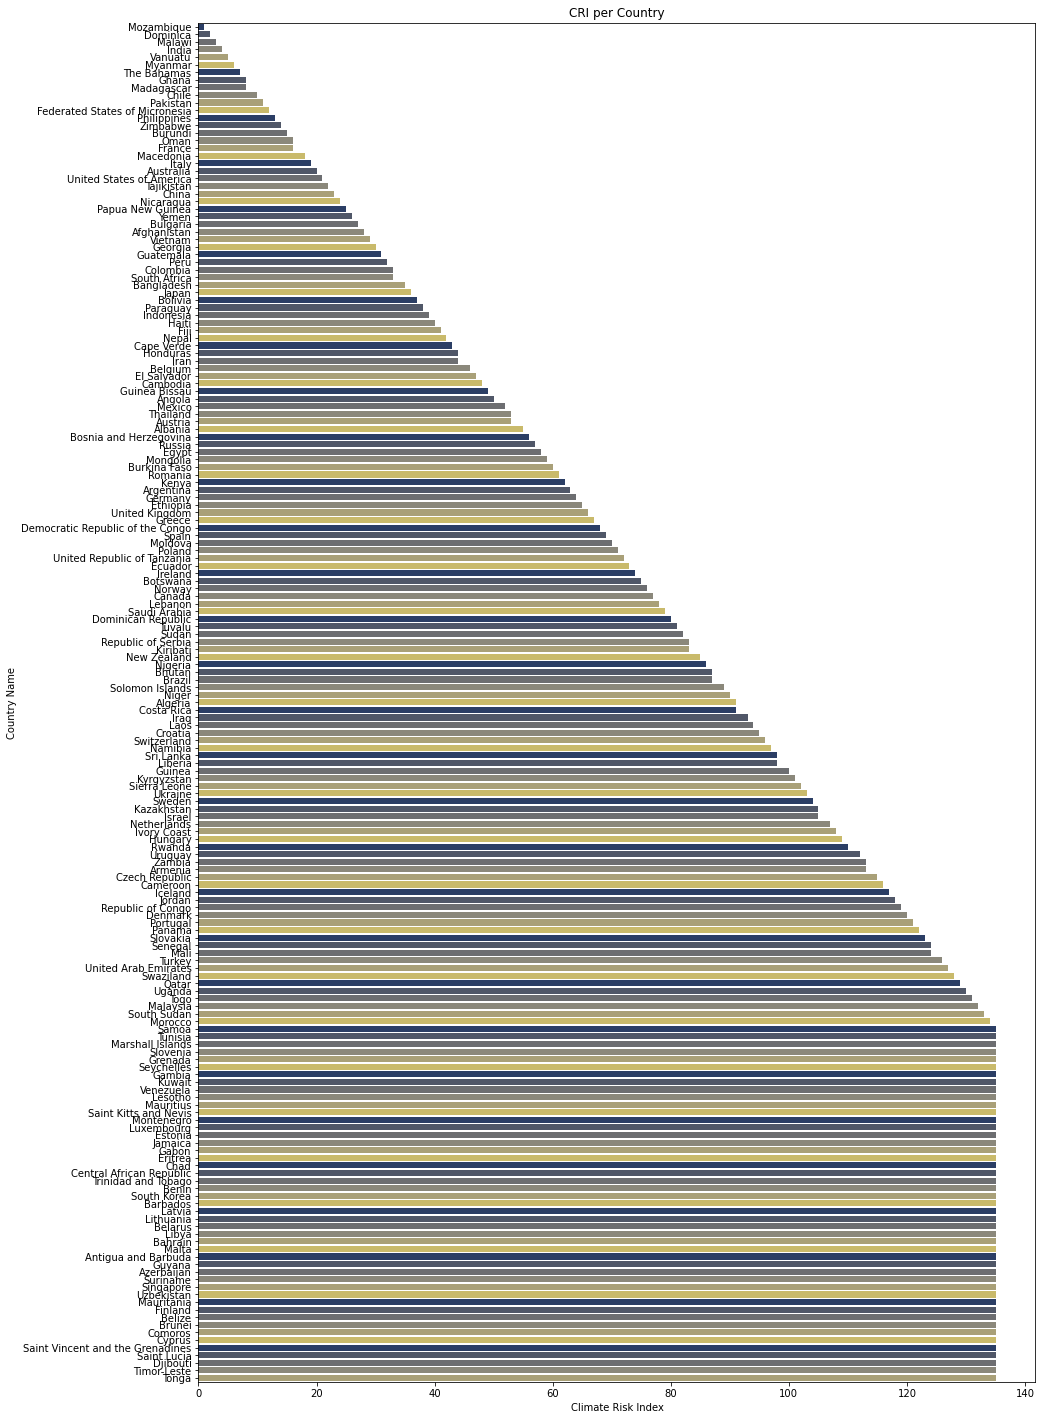

In [363]:
plt.figure(figsize=(15,25))
plt.title("CRI per Country")
sns.barplot(data=index_df, x="cri_rank", y="rw_country_name",
                        order=index_df.sort_values('cri_rank').rw_country_name,
                        palette=sns.color_palette('cividis'))
plt.xlabel('Climate Risk Index')
plt.ylabel('Country Name')

plt.show()

- Countries with high CRI scores often face substantial economic losses due to damage to infrastructure, agriculture.These losses can hinder economic growth and development.
- High CRI scores are associated with increased fatalities, injuries, and displacement of people.


#### Climate impact on Health

##### Top 10 Countries affected by Fatalities

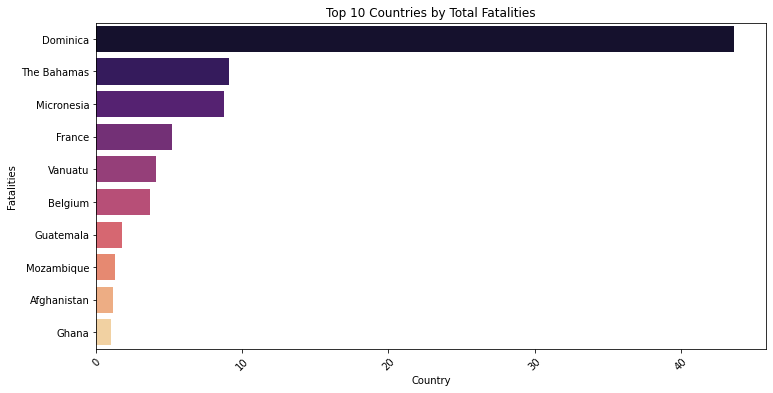

In [364]:
# Top 10 countries by fatalities
top_fatalities = index_df.nlargest(10, 'fatalities_per_100k_total')
plt.figure(figsize=(12, 6))
sns.barplot(y='country', x='fatalities_per_100k_total', data=top_fatalities, palette='magma')
plt.title('Top 10 Countries by Total Fatalities')
plt.xlabel('Country')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

1. Health Impacts
- Countries like India,France and the United Pakistan have high fatality counts due to their large populations and frequent exposure to extreme weather events like cyclones,flood,droughts affecting densely polpulated areas.

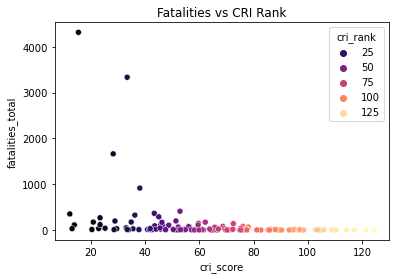

In [365]:
sns.scatterplot(data=index_df, x='cri_score', y='fatalities_total', hue='cri_rank', palette='magma')
plt.title('Fatalities vs CRI Rank')
plt.show()

##### Observations

- From the graph it shows India has the highest fatalities due to climate changecompared to other countries.
- Countries with high bars like India,France,Pakistan should be prioritized for climate adaptation strategies.
- Understanding this distribution can help in resource allocation and disaster preparedness.


#### Climate Impact on Economy

##### Top 10 countries affected by climate related Economic losses

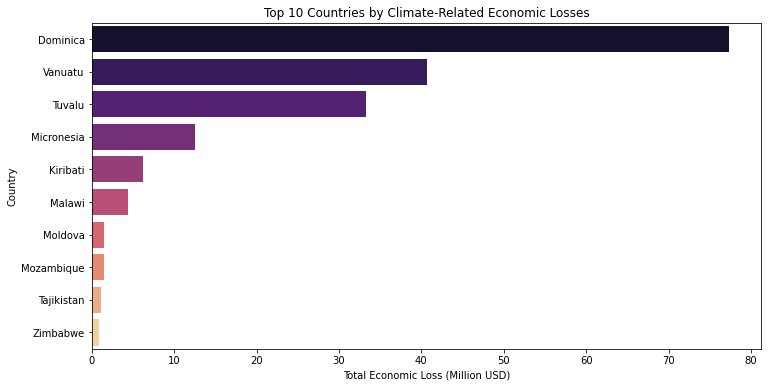

In [366]:
top_countries_with_losses = index_df.nlargest(10, 'losses_per_gdp__total')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries_with_losses['country'], x=top_countries_with_losses['losses_per_gdp__total'], palette='magma')
plt.title("Top 10 Countries by Climate-Related Economic Losses")
plt.xlabel("Total Economic Loss (Million USD)")
plt.ylabel("Country")
plt.show()

##### Observations

1. Health Impacts
- Countries like India,China and the United States have high fatality counts due to their large populations and frequent exposure to extreme weather events.
2. Economic impacts
- Countries like the United States, China, and India often show high economic losses due to infrastructure damage and disaster costs.

#### Regional Analysis (CRI score per Country)

##### 10 Most Affected country


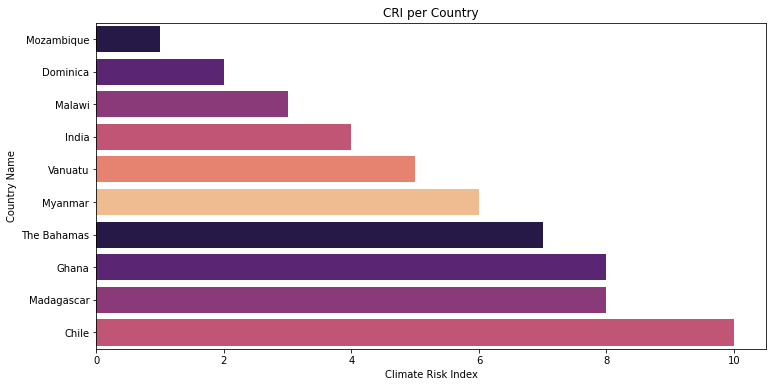

In [369]:
plt.figure(figsize=(12,6))
plt.title("CRI per Country")
ax = sns.barplot(data=index_df, x="cri_rank", y="rw_country_name",
                        order=index_df.sort_values('cri_rank').rw_country_name[:10],
                        palette=sns.color_palette('magma'))                       
plt.xlabel('Climate Risk Index')
plt.ylabel('Country Name')

plt.show()

#### Correlation

In [372]:
# Relevant columns for correlation analysis
correlation_data = index_df[['cri_score', 'losses_per_gdp__total', 'fatalities_total', 'fatalities_per_100k_total','losses_usdm_ppp_total',]]

# compute correlation
correlation_matrix = correlation_data.corr()

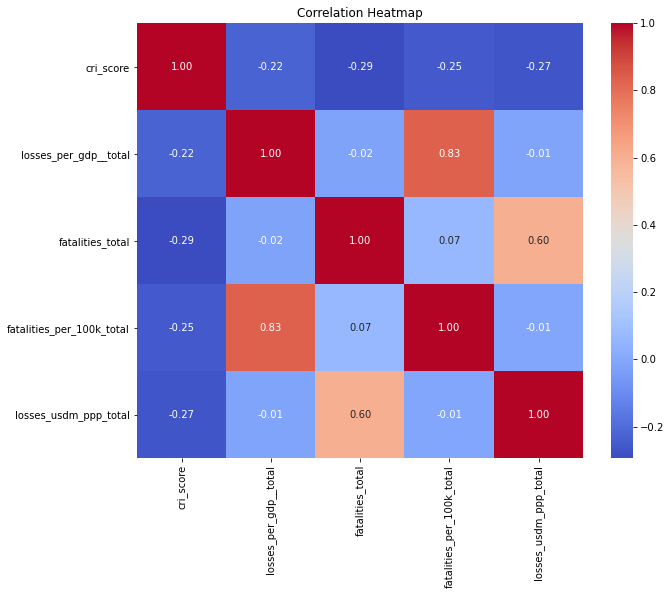

In [373]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Prediction Model

In [370]:
# Predicting CRI Score based on Economic and Health Factors
features = ['fatalities_total', 'losses_usdm_ppp_total', 'losses_per_gdp__total']
target = 'cri_score'


X = index_df[features]
y = index_df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Performance:\n Mean Absolute Error: {mae}\n R-squared: {r2}')


Model Performance:
 Mean Absolute Error: 6.042975000000002
 R-squared: 0.9020783333304231


In [371]:

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Hyperparameter tuning
param_grid = {
    'RandomForest': {'n_estimators': [50, 100, 200]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

best_models = {}
for name, model in models.items():
    print(f'Tuning {name}...')
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'Best Parameters for {name}: {grid_search.best_params_}')

# Evaluate models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Performance:\n Mean Absolute Error: {mae:.2f}\n R-squared: {r2:.2f}')


Tuning RandomForest...
Best Parameters for RandomForest: {'n_estimators': 100}
Tuning GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 0.2, 'n_estimators': 50}
Tuning XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}
RandomForest Performance:
 Mean Absolute Error: 6.01
 R-squared: 0.90
GradientBoosting Performance:
 Mean Absolute Error: 6.61
 R-squared: 0.88
XGBoost Performance:
 Mean Absolute Error: 7.44
 R-squared: 0.85


Model tuning results indicate that RandomForest tuned/untuned
 performed the best with an R² of 0.89 and a MAE of 6.33. GradientBoosting performed similarly, while XGBoost had slightly worse performance.